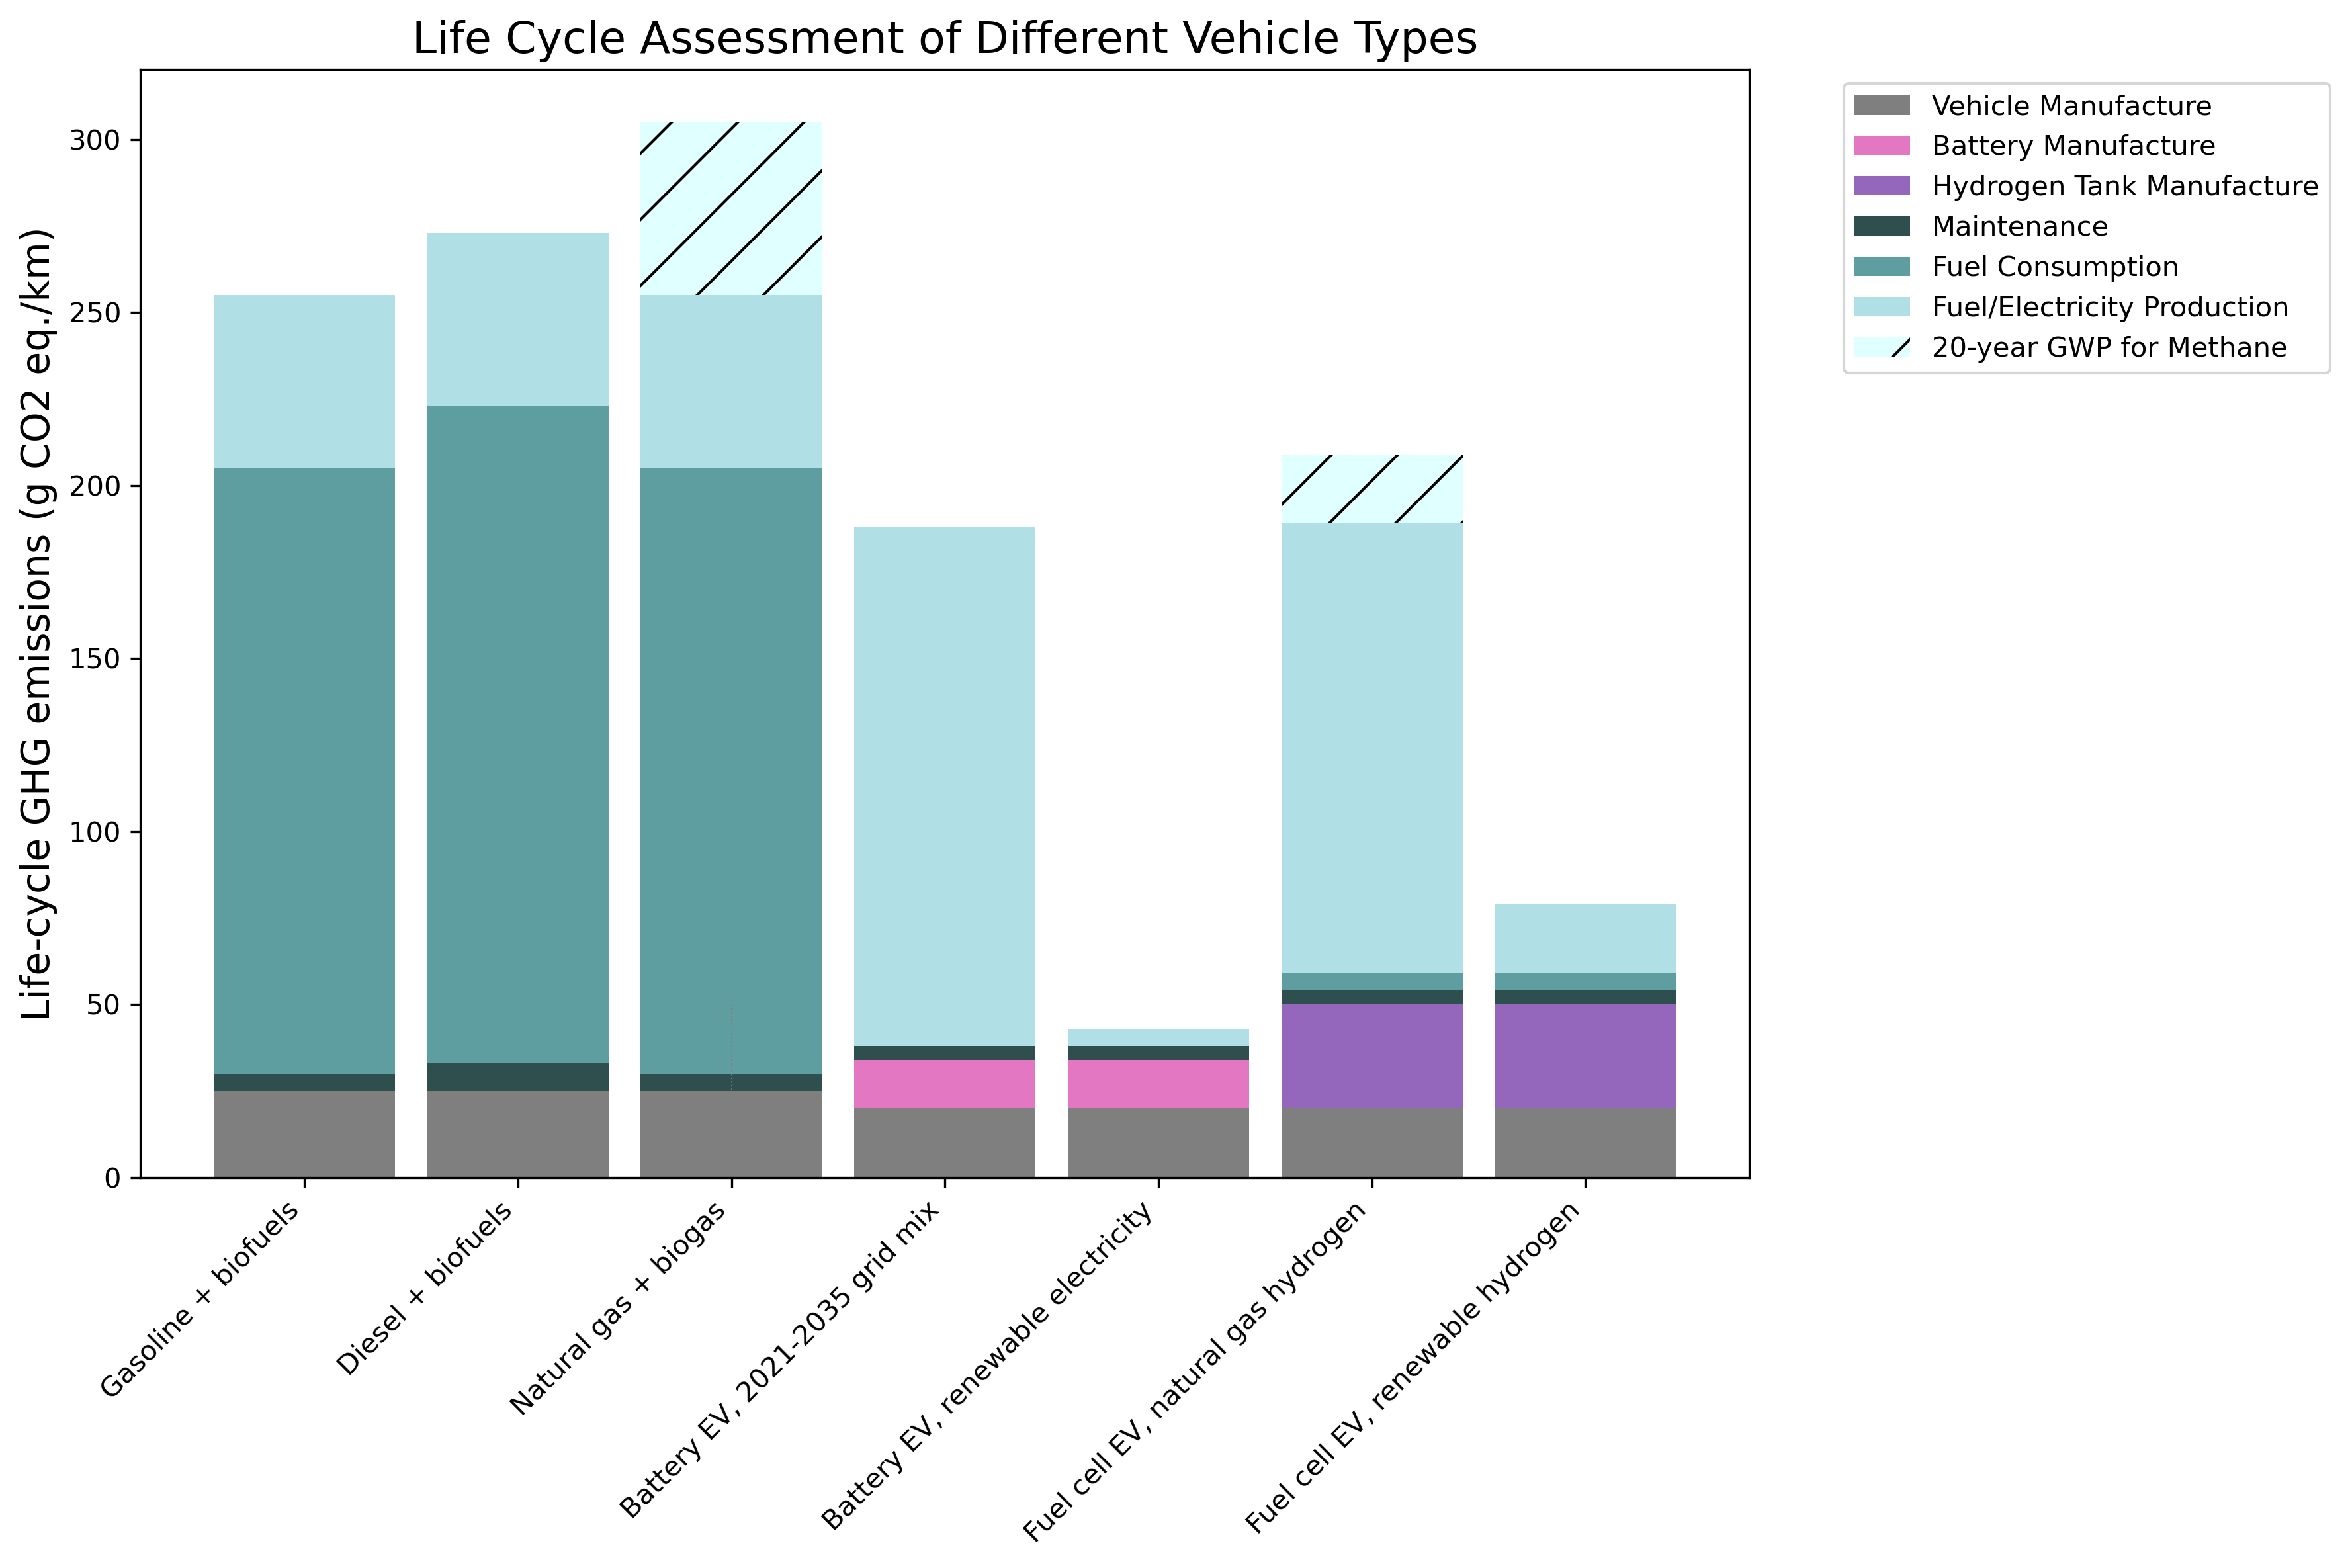

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

vehicles = ['Gasoline + biofuels', 'Diesel + biofuels', 'Natural gas + biogas', 'Battery EV, 2021-2035 grid mix', 'Battery EV, renewable electricity', 'Fuel cell EV, natural gas hydrogen', 'Fuel cell EV, renewable hydrogen']

# Data for each component of the life-cycle GHG emissions (in g CO2 eq./km) for each vehicle type
methane_GWP = [0, 0, 50, 0, 0, 20, 0]
fuel_electricity_production = [50, 50, 50, 150, 5, 130, 20]
fuel_consumption = [175, 190, 175, 0, 0, 5, 5]
maintenance = [5, 8, 5, 4, 4, 4, 4]
hydrogen_tank_manufacture = [0, 0, 0, 0, 0, 30, 30]
battery_manufacture = [0, 0, 0, 14, 14, 0, 0]
vehicle_manufacture = [25, 25, 25, 20, 20, 20, 20]
current_policies_vs_Paris = [0, 0, 0, 0, 0, 0, 0]

bar_width = 0.85
bar_gap = 0.04

r = np.arange(len(vehicles))

plt.figure(figsize=(12, 8), dpi=300)

# Plotting each component as a stacked bar for each vehicle type
plt.bar(r, vehicle_manufacture, color='tab:gray', width=bar_width, label='Vehicle Manufacture')
plt.bar(r, battery_manufacture, bottom=vehicle_manufacture, color='tab:pink', width=bar_width, label='Battery Manufacture')
plt.bar(r, hydrogen_tank_manufacture, bottom=np.array(vehicle_manufacture) + np.array(battery_manufacture), color='tab:purple', width=bar_width, label='Hydrogen Tank Manufacture')
plt.bar(r, maintenance, bottom=np.array(vehicle_manufacture) + np.array(battery_manufacture) + np.array(hydrogen_tank_manufacture), color='darkslategray', width=bar_width, label='Maintenance')
plt.bar(r, fuel_consumption, bottom=np.array(vehicle_manufacture) + np.array(battery_manufacture) + np.array(hydrogen_tank_manufacture) + np.array(maintenance), color='cadetblue', width=bar_width, label='Fuel Consumption')
plt.bar(r, fuel_electricity_production, bottom=np.array(vehicle_manufacture) + np.array(battery_manufacture) + np.array(hydrogen_tank_manufacture) + np.array(maintenance) + np.array(fuel_consumption), color='powderblue', width=bar_width, label='Fuel/Electricity Production')
bars = plt.bar(r, methane_GWP, bottom=np.array(vehicle_manufacture) + np.array(battery_manufacture) + np.array(hydrogen_tank_manufacture) + np.array(maintenance) + np.array(fuel_consumption) + np.array(fuel_electricity_production), color='lightcyan', hatch='/', width=bar_width, label='20-year GWP for Methane')

for i in r:
    plt.plot([i, i], [0, methane_GWP[i]], color='gray', linestyle='dotted', linewidth=0.5)

plt.xticks(r, vehicles, rotation=45, ha='right', fontsize=10)
plt.ylabel('Life-cycle GHG emissions (g CO2 eq./km)', fontsize=14)
plt.title('Life Cycle Assessment of Different Vehicle Types', fontsize=16)

legend_labels = ['Vehicle Manufacture', 'Battery Manufacture', 'Hydrogen Tank Manufacture', 'Maintenance', 'Fuel Consumption', 'Fuel/Electricity Production', '20-year GWP for Methane']
legend_colors = ['tab:gray', 'tab:pink', 'tab:purple', 'darkslategray', 'cadetblue', 'powderblue', 'lightcyan']
legend_patches = [patches.Patch(facecolor=color, hatch='/' if color == 'lightcyan' else '') for color in legend_colors]
plt.legend(legend_patches, legend_labels, fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig('life_cycle_assessment.png', dpi=300)

plt.tight_layout()
plt.show()